# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

### A simple app

In this notebook we build a very simple app that uses our exported model.

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/> Note how we are not importing anything from our source code (we do not use any module from the ``src`` directory). This is because the exported model, differently from the model weights, is a standalone serialization of our model and therefore it does not need anything else. You can ship that file to anybody, and as long as they can import ``torch``, they will be able to use your model. This is very important for releasing pytorch models to production.

### Test your app
Go to a search engine for images (like Google Images) and search for images of some of the landmarks, like the Eiffel Tower, the Golden Gate Bridge, Machu Picchu and so on. Save a few examples locally, then upload them to your app to see how your model behaves!

The app will show the top 5 classes that the model think are most relevant for the picture you have uploaded

In [6]:
from ipywidgets import VBox, Button, FileUpload, Output, Label
from PIL import Image
from IPython.display import display
import io
import numpy as np
import torchvision
import torchvision.transforms as T
import torch

# Decide which model you want to use among the ones exported
learn_inf = torch.jit.load("checkpoints/transfer_exported.pt")

def on_click_classify(change):

    # Load image that has been uploaded
    fn = io.BytesIO(btn_upload.data[-1])

    img = Image.open(fn)
    img.load()

    # Let's clear the previous output (if any)
    out_pl.clear_output()

    # Display the image
    with out_pl:

        ratio = img.size[0] / img.size[1]
        c = img.copy()
        c.thumbnail([ratio * 200, 200])
        display(c)

    # Transform to tensor
    timg = T.ToTensor()(img).unsqueeze_(0)

    # Calling the model
    softmax = learn_inf(timg).data.cpu().numpy().squeeze()
    
    # Get the indexes of the classes ordered by softmax
    # (larger first)
    idxs = np.argsort(softmax)[::-1]
    
    # Loop over the classes with the largest softmax
    for i in range(5):
        # Get softmax value
        p = softmax[idxs[i]]
    
        # Get class name
        landmark_name = learn_inf.class_names[idxs[i]]
        
        labels[i].value = f"{landmark_name} (prob: {p:.2f})"


# Putting back btn_upload to a widget for next cell
btn_upload = FileUpload()

btn_run = Button(description="Classify")
btn_run.on_click(on_click_classify)

labels = []
for _ in range(5):
    labels.append(Label())

out_pl = Output()
out_pl.clear_output()

wgs = [Label("Please upload a picture of a landmark"), btn_upload, btn_run, out_pl]
wgs.extend(labels)

VBox(wgs)

code/__torch__/torchvision/transforms/functional.py:188: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).


16.Eiffel_Tower (prob: 0.81)
14.Terminal_Tower (prob: 0.07)
31.Washington_Monument (prob: 0.02)
17.Changdeokgung (prob: 0.01)
29.Petronas_Towers (prob: 0.01)


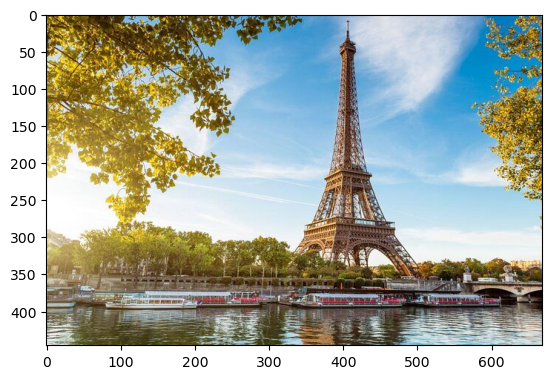

In [6]:
from PIL import Image
import numpy as np
import torchvision
import torchvision.transforms as T
import torch
import matplotlib.pyplot as plt

# Decide which model you want to use among the ones exported
learn_inf = torch.jit.load("checkpoints/transfer_exported.pt")

img = Image.open('images/eiffel-tower.jpg')

plt.imshow(img)

# Transform to tensor
timg = T.ToTensor()(img).unsqueeze_(0)

# Calling the model
softmax = learn_inf(timg).data.cpu().numpy().squeeze()

# Get the indexes of the classes ordered by softmax
# (larger first)
idxs = np.argsort(softmax)[::-1]

# Loop over the classes with the largest softmax
labels = ['' for _ in range(5)]
for i in range(5):
    # Get softmax value
    p = softmax[idxs[i]]

    # Get class name
    landmark_name = learn_inf.class_names[idxs[i]]

    labels[i] = f"{landmark_name} (prob: {p:.2f})"
    
for label in labels:
    print(label)

## (optional) Standalone app or web app

You can run this notebook as a standalone app on your computer by following these steps:

1. Download this notebook in a directory on your machine
2. Download the model export (for example, ``checkpoints/transfer_exported.pt``) in a subdirectory called ``checkpoints`` within the directory where you save the app.ipynb notebook
3. Install voila if you don't have it already (``pip install voila``)
4. Run your app: ``voila app.ipynb --show_tracebacks=True``
5. Customize your notebook to make your app prettier and rerun voila

You can also deploy this app as a website using Binder: https://voila.readthedocs.io/en/stable/deploy.html#deployment-on-binder

# Create your submission archive

Now that you are done with your project, please run the following cell. It will generate a file containing all the code you have written, as well as the notebooks. Please submit that file to complete your project

In [9]:
!python src/create_submit_pkg.py

executing: jupyter nbconvert --to html transfer_learning.ipynb
[NbConvertApp] Converting notebook transfer_learning.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 466705 bytes to transfer_learning.html
executing: jupyter nbconvert --to html app.ipynb
[NbConvertApp] Converting notebook app.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 1 image(s).
[NbConvertApp] Writing 784470 bytes to app.html
executing: jupyter nbconvert --to html cnn_from_scratch.ipynb
[NbConvertApp] Converting notebook cnn_from_scratch.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 1540187 bytes to cnn_from_scratch.html
Adding files to submission_2024-07-21T19h59m.tar.gz
src/model.py
src/transfer.py
src/helpers.py
src/optimization.py
src/data.py
src/train.py
src/predictor.py
src/__init__.py
src/create_submit_pkg.py
transfer_learning.ipynb
app.ipynb
cnn_from_scratch.ipynb
app.html